# 🚢 **Projet Kaggle : Titanic**

Bienvenue dans ce notebook dédié à la compétition Kaggle *Titanic: Machine Learning from Disaster*.

## **Contexte du projet**

L'objectif est de prédire la survie des passagers du Titanic à partir de leurs caractéristiques (âge, sexe, classe, etc.). Cette compétition est très populaire et sert de porte d’entrée pour se familiariser avec toutes les étapes d’un projet de **Machine Learning**. C'est donc avec passion que je me lance dans mon premier modèle de Machine Learning en compétition. Voici ci-après, les détails de ma reflexion et de ma méthodologie pour mettre au point un modèle capable de prédire la survie des passagers du Titanic.


# 📜 **Plan du Notebook**

1. [Import des librairies et des données](#section1)  
2. [Analyse exploratoire (EDA)](#section2)  
3. [Prétraitement des données](#section3)  
4. [Feature Engineering](#section4)  
5. [Modélisation](#section5)  
6. [Évaluation et soumission](#section6)  

Nous détaillerons dans chaque section nos choix et nos observations pour une meilleure compréhension.


<a id="section1"></a>
# 💾 **1. Import des librairies et des données**

Dans cette section, nous allons :

- Importer les bibliothèques nécessaires (**pandas**, **numpy**, **sklearn**, etc.).  
- Charger nos fichiers CSV (train et test).  
- Afficher un aperçu rapide des données (head, info, describe...).


In [1]:
# ==========================
# 1. Import des librairies
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pour la modélisation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# ==========================
# 2. Chargement des données
# ==========================
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

print("Train data shape :", train_data.shape)
print("Test data shape  :", test_data.shape)

Train data shape : (891, 12)
Test data shape  : (418, 11)


In [3]:
# Affichage d'un aperçu
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 📋 **Description des colonnes principales**

- **Survived** : 0 = Non survécu, 1 = Survécu (variable cible).  
- **Pclass** : Classe du billet (1 = Première, 2 = Deuxième, 3 = Troisième).  
- **Name, Sex, Age** : Informations personnelles sur le passager.  
- **SibSp** : Nombre de frères/sœurs ou époux(-se) à bord.  
- **Parch** : Nombre de parents ou enfants à bord.  
- **Ticket** : Numéro du billet.  
- **Fare** : Tarif du billet.  
- **Cabin** : Numéro de cabine.  
- **Embarked** : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).


<a id="section2"></a>
# 🔎 **2. Analyse exploratoire (EDA)**

1. Observation des premières lignes et des informations globales (types, valeurs manquantes).  
2. Statistiques descriptives pour les variables numériques et catégorielles.  
3. Visualisation de la variable cible (*Survived*) pour la répartition 0/1.  
4. Exploration d’autres variables (Sex, Pclass, Age, etc.) afin de découvrir des tendances ou corrélations.


In [4]:
# ================================
# 1. Aperçu global des données
# ================================
display(train_data.head())
train_data.info()  # Donne le type de chaque colonne et le nombre de valeurs non nulles

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# =================================
# 2. Statistiques descriptives
# =================================
display(train_data.describe(include='all'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# =================================
# 3. Distribution de la variable cible
# =================================
survived_counts = train_data['Survived'].value_counts()
print("Répartition Survived :\n", survived_counts)

Répartition Survived :
 Survived
0    549
1    342
Name: count, dtype: int64


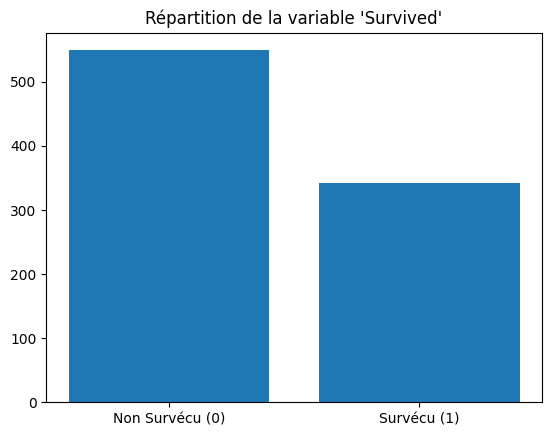

In [7]:
# Visualisation de la répartition du taux de survivants
plt.bar(['Non Survécu (0)', 'Survécu (1)'], survived_counts)
plt.title("Répartition de la variable 'Survived'")
plt.show()

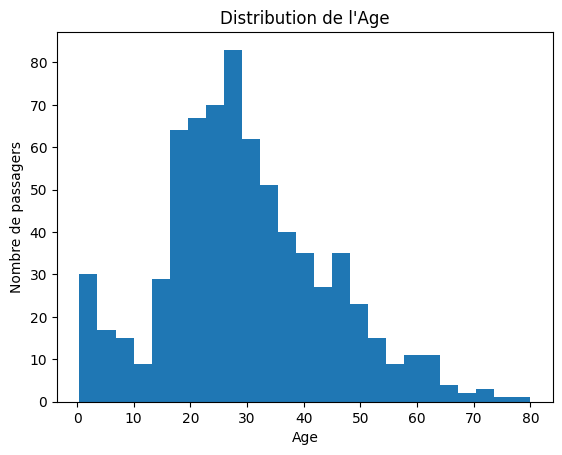

In [8]:
import matplotlib.pyplot as plt

plt.hist(train_data['Age'].dropna(), bins=25)
plt.xlabel('Age')
plt.ylabel('Nombre de passagers')
plt.title('Distribution de l\'Age')
plt.show()

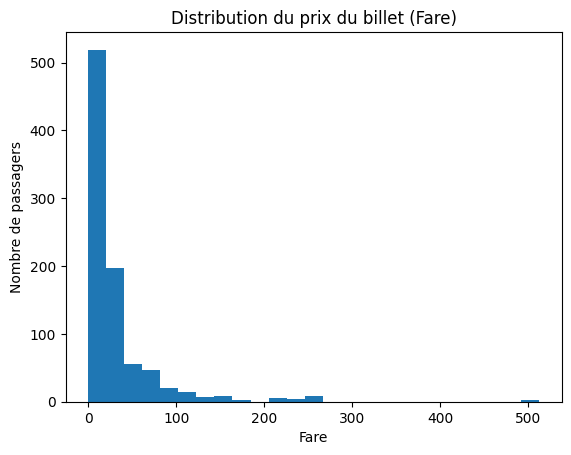

In [9]:
plt.hist(train_data['Fare'].dropna(), bins=25)
plt.xlabel('Fare')
plt.ylabel('Nombre de passagers')
plt.title('Distribution du prix du billet (Fare)')
plt.show()

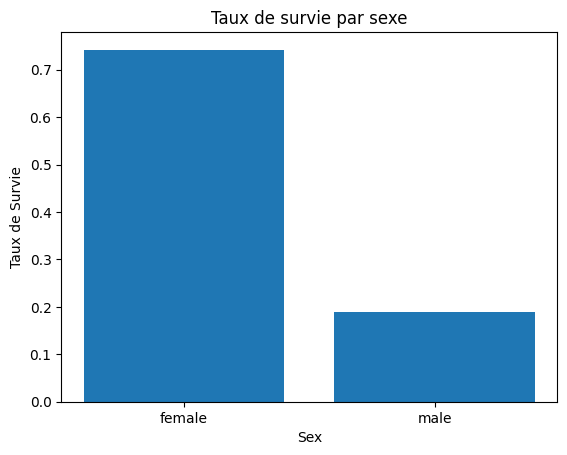

In [10]:
survived_by_sex = train_data.groupby('Sex')['Survived'].mean()

plt.bar(survived_by_sex.index, survived_by_sex)
plt.xlabel('Sex')
plt.ylabel('Taux de Survie')
plt.title('Taux de survie par sexe')
plt.show()

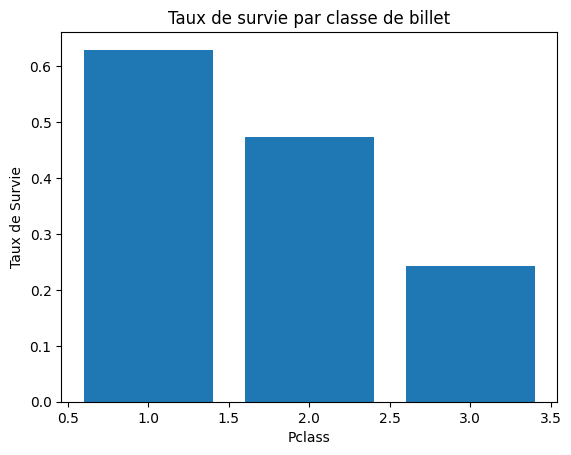

In [11]:
survived_by_pclass = train_data.groupby('Pclass')['Survived'].mean()

plt.bar(survived_by_pclass.index, survived_by_pclass)
plt.xlabel('Pclass')
plt.ylabel('Taux de Survie')
plt.title('Taux de survie par classe de billet')
plt.show()

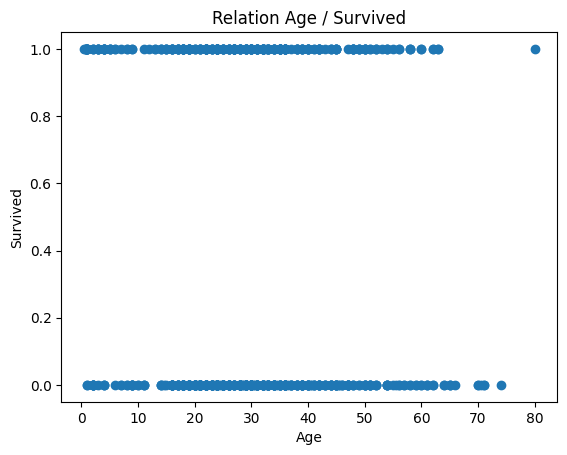

In [12]:
plt.scatter(train_data['Age'], train_data['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Relation Age / Survived')
plt.show()

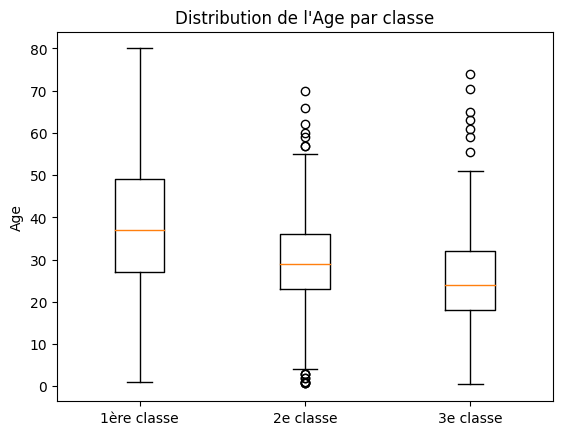

In [13]:
# Préparons les données pour chaque classe
age_class1 = train_data[train_data['Pclass'] == 1]['Age'].dropna()
age_class2 = train_data[train_data['Pclass'] == 2]['Age'].dropna()
age_class3 = train_data[train_data['Pclass'] == 3]['Age'].dropna()

plt.boxplot([age_class1, age_class2, age_class3], labels=['1ère classe', '2e classe', '3e classe'])
plt.ylabel('Age')
plt.title("Distribution de l'Age par classe")
plt.show()

<a id="section3"></a>
# 🧹 **3. Prétraitement des données**

Nous allons :

- Gérer les valeurs manquantes (Age, Cabin, Embarked...).  
- Supprimer ou convertir les colonnes jugées moins pertinentes (Ticket, Cabin...).  
- Encoder les variables catégorielles (Sex, Embarked...).

Objectif : Obtenir un dataset **prêt pour le Machine Learning**.


In [14]:
# ======================
# 1. Copie des DataFrames
# ======================
train_df = train_data.copy()
test_df = test_data.copy()

In [15]:
# =====================================
# 2. Suppression de colonnes peu utiles
# =====================================
# (Cabin est souvent très incomplète et Ticket rarement utile)
train_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [16]:
# ======================================
# 3. Traitement des valeurs manquantes
# ======================================
# Embarked (remplacement par la valeur la plus fréquente)
most_common_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_common_embarked, inplace=True)
test_df['Embarked'].fillna(most_common_embarked, inplace=True)

# Age (imputation par la moyenne)
imputer = SimpleImputer(strategy='mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])

# Vérification rapide
print("Valeurs manquantes dans train_df :\n", train_df.isnull().sum())
print("\nValeurs manquantes dans test_df :\n", test_df.isnull().sum())

Valeurs manquantes dans train_df :
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Valeurs manquantes dans test_df :
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


<ipython-input-16-d1928306f801>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(most_common_embarked, inplace=True)
<ipython-input-16-d1928306f801>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [17]:
# =====================
# 4. Encodage du Sex
# =====================
le_sex = LabelEncoder()
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])
test_df['Sex'] = le_sex.transform(test_df['Sex'])

In [18]:
# =========================
# 5. Encodage du Embarked
# =========================
le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

In [19]:
# Aperçu du résultat
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


# 🕳 **Observation des valeurs manquantes**

- `Age` : plusieurs valeurs manquantes (souvent imputées par la moyenne ou la médiane).  
- `Cabin` : souvent très incomplet ; on peut le retirer ou en faire un indicateur binaire (CabinKnown vs. Unknown).  
- `Embarked` : rarement manquant, mais on peut remplacer par la valeur la plus fréquente (le mode).


# 🔐 **Encodage des variables catégorielles**

- `Sex` : transformation de *male/female* en valeurs numériques (0/1 ou 1/0).  
- `Embarked` : transformation de *C/Q/S* via `LabelEncoder` ou `pd.get_dummies`.


<a id="section4"></a>
# 🏗 **4. Feature Engineering**

Pour améliorer la performance, on peut générer de nouvelles variables à partir de l’existant :

- **Title** : Extraire (Mr, Mrs, Miss, Dr...) depuis le *Name*.  
- **FamilySize** : Calculer `SibSp + Parch + 1`.  
- Regrouper des catégories rares ou transformer certaines features (ex. regrouper par tranches d’âge).


In [20]:
# ========================
# 1. Extraire le Title
# ========================
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

# On regroupe les titres rares
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Countess',
               'Jonkheer', 'Don', 'Dona', 'Mme', 'Ms', 'Mlle', 'Capt', 'Sir']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Rare')

# Encodage en numérique
le_title = LabelEncoder()
train_df['Title'] = le_title.fit_transform(train_df['Title'])
test_df['Title'] = le_title.transform(test_df['Title'])

In [21]:
# ==========================
# 2. Calcul de FamilySize
# ==========================
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# On peut supprimer la colonne Name si elle ne nous est plus utile
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [22]:
# Vérification finale
display(train_df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,2,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,3,2
2,3,1,3,0,26.0,0,0,7.9250,2,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,2
4,5,0,3,1,35.0,0,0,8.0500,2,2,1


<a id="section5"></a>
# 🤖 **5. Modélisation**

- Séparer la variable cible (*Survived*) du reste des features.  
- Diviser l’entraînement en un *train set* et un *validation set* (ex. 80 % / 20 %).  
- Tester différents algorithmes (RandomForest, LogisticRegression, XGBoost, etc.).  
- Évaluer la performance via **accuracy**, **cross-validation**, ou **matrice de confusion**.


In [23]:
# ===============================
# 1. Séparation features / cible
# ===============================
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [24]:
# =============================================================
# 2. Division en train set / validation set (ex. 80% / 20%)
# =============================================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [25]:
# =============================
# 3. Entraînement d'un modèle
# =============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# ======================
# 4. Évaluation initiale
# ======================
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy sur le set de validation :", accuracy)

Accuracy sur le set de validation : 0.8491620111731844


In [27]:
# Bonus : Cross-validation sur l'ensemble train_df
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-val (5 folds) Accuracy :", np.mean(cv_scores))

Cross-val (5 folds) Accuracy : 0.8159625886636117


<a id="section6"></a>
# 🏁 **6. Évaluation et soumission**

- Générer les prédictions sur le jeu de test (qui ne contient pas la colonne *Survived*).  
- Créer un fichier `submission.csv` contenant le *PassengerId* et la prédiction *Survived*.  
- Soumettre le fichier sur la plateforme Kaggle pour obtenir un score.

**Conseil** : Testez plusieurs modèles et hyperparamètres, affinez le *Feature Engineering* pour gagner des points !


In [28]:
from sklearn.impute import SimpleImputer

imputer_fare = SimpleImputer(strategy='mean')
# On "fit" l'imputer sur le train, pour être cohérent
imputer_fare.fit(train_df[['Fare']])

# Ensuite, on l'applique au test
test_df['Fare'] = imputer_fare.transform(test_df[['Fare']])

In [29]:
# =======================================================
# 1. Préparation des features pour le dataset de test
# =======================================================
test_features = test_df.copy()

In [30]:
# =====================================
# 2. Prédictions sur le jeu de test
# =====================================
test_predictions = model.predict(test_features)

In [31]:
# ==================================
# 3. Création du fichier de sortie
# ==================================
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

In [32]:
submission.to_csv('submission-rayan-belhadi.csv', index=False)
print("Fichier 'submission-rayan-belhadi.csv' généré avec succès !")

Fichier 'submission-rayan-belhadi.csv' généré avec succès !


# 🏆 **Conclusion et perspectives**

- Le *Titanic* est un cas d’étude parfait pour apprendre les bases du **Machine Learning** et de la **Data Science**.  
- Pistes d’amélioration : affiner les paramètres des algorithmes, explorer d'autres modèles, créer des features plus pertinentes, etc... Je reserve cela pour mon prochain essai sur la plateforme.
- Notre modèle parvient à atteindre une précisoin (accuracy) de 85% et semble bien apprendre.
- Il ne s'agit que du *premier modèle* prédictif et je compte en tester d'autres en affinant et en ajustant les paramètres d'apprentissage.
- Le modèle de test parvient à determiner si un passsager à surveccu ou non, et indique sa prédiction avec un 1 ou un 0 dans un fichier que j'appelle "submission-rayan-belhadi.csv".
